In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from datetime import datetime

%matplotlib inline

# GitHub Users Analysis

In [2]:
categories = {
    'watch': ['WatchEvent'],
    'interact': ['CommitCommentEvent', 'GollumEvent', 'PullRequestReviewCommentEvent','IssuesEvent', 
                 'IssueCommentEvent'],
    'contribute': ['CreateEvent', 'DeleteEvent', 'PullRequestEvent', 'PushEvent','ReleaseEvent', 'MemberEvent'],
    'fork': ['ForkEvent']
}

cat_list = ['contribute','interact','watch']
cat_list_2 = cat_list + ['fork']

def define_category(event):
    for c in categories.keys():
        if event in categories[c]:
            return c

def get_perc_distr(row, clist):
    sum_a = sum([row[c] for c in clist])
    
    norm_row = {}
    for c in clist:
        norm_row[c] = float(row[c])/sum_a
        
    return pd.Series(norm_row)

In [3]:
path = './'

# Users behavior

Analysis of users and how they interact inside target projects based on historical data of GitHub activities in **2015** and **2016**.

In [4]:
# data import
a18 = pd.read_csv(path + 'target_a_2018.csv', parse_dates=['created_at'])

In [5]:
a18.head()

,source,target,event,created_at
0,34407843,94911145,WatchEvent,2018-01-09 03:00:00+00:00
1,20942571,103645588,PushEvent,2018-01-09 03:00:08+00:00
2,30802089,101394335,IssueCommentEvent,2018-01-09 03:00:23+00:00
3,34146419,88111990,ForkEvent,2018-01-09 03:00:28+00:00
4,1789,113402414,WatchEvent,2018-01-09 03:00:32+00:00


In [6]:
a18['event'].unique()

array(['WatchEvent', 'PushEvent', 'IssueCommentEvent', 'ForkEvent',
       'IssuesEvent', 'PullRequestReviewCommentEvent', 'PullRequestEvent',
       'CommitCommentEvent', 'CreateEvent', 'DeleteEvent', 'ReleaseEvent',
       'MemberEvent', 'GollumEvent', 'PublicEvent'], dtype=object)

In [7]:
# basic statistics
print('#activities: {}'.format(a18.shape[0])) 
print('#users: {}'.format(len(a18['source'].unique())))
print('#users: {}'.format(len(a18['target'].unique())))

#activities: 2999985
#users: 736650
#users: 500


In [8]:
a_per_p = a18.groupby('target')['source'].count()
a_per_p.describe()

count      500.000000
mean      5999.970000
std       7498.639061
min         32.000000
25%       2049.250000
50%       3838.500000
75%       7093.250000
max      83531.000000
Name: source, dtype: float64

In [8]:
a18['cat'] = a18['event'].apply(lambda x: define_category(x))

In [9]:
a18['cat'].value_counts()

watch         1597532
interact       756441
contribute     360622
fork           285370
Name: cat, dtype: int64

## Activities Distribution

In [10]:
cat = a18.groupby(by=['target', 'cat'])[['source']].count().reset_index()
cat.columns = ['project', 'category', '#events']

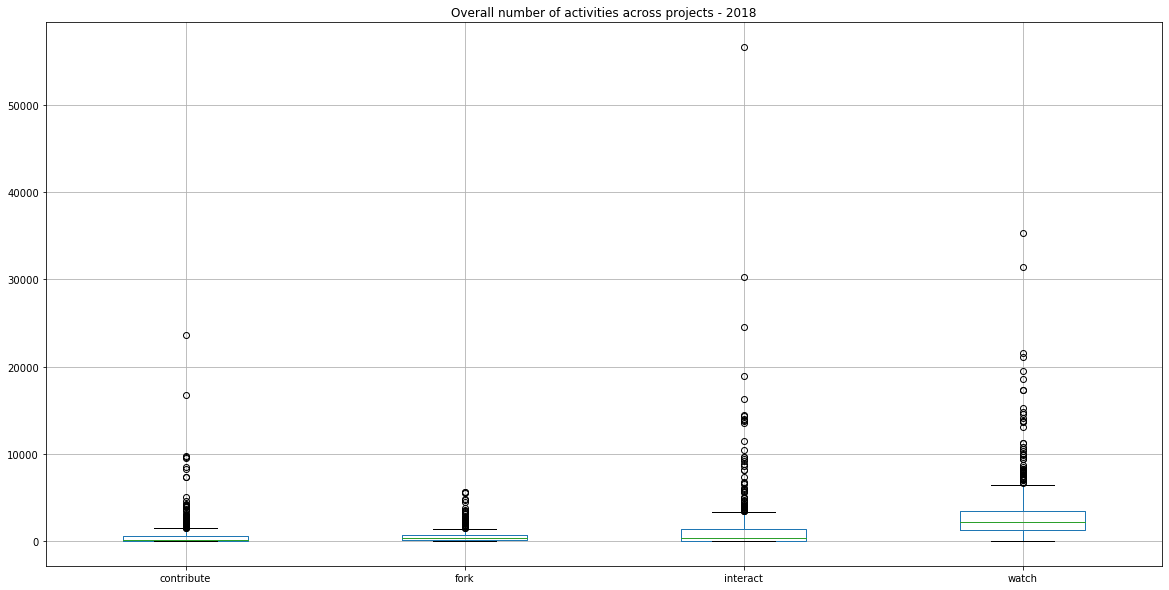

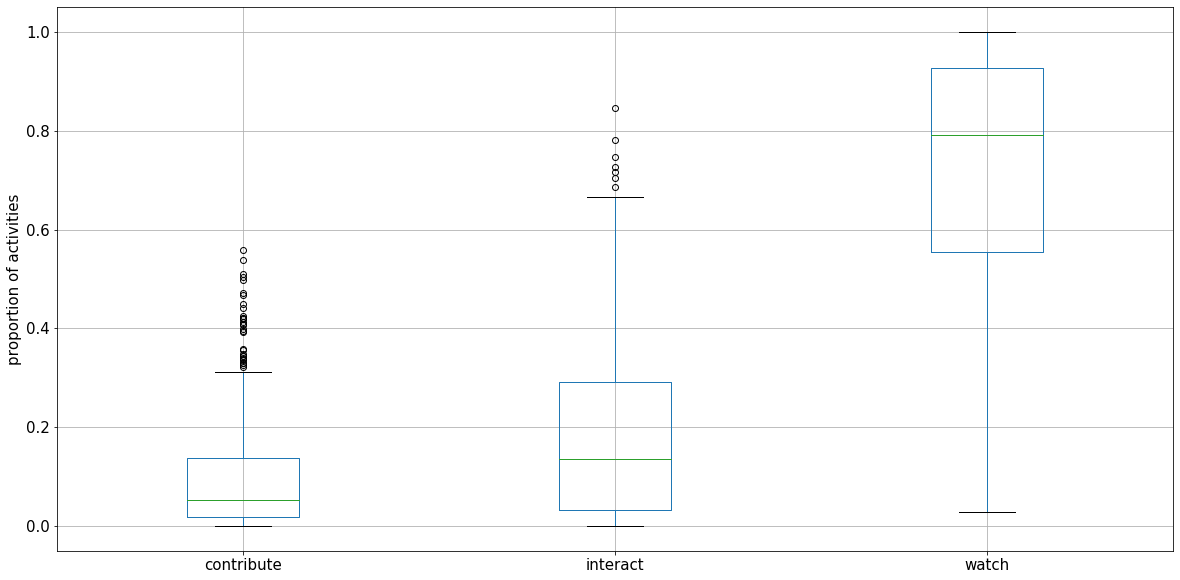

In [11]:
distr = cat.pivot(index='project', columns='category', values='#events').fillna(0)
distr.boxplot(figsize=(20,10))
plt.title('Overall number of activities across projects - 2018')

plt.figure(2, figsize=(20,10))
distr.apply(lambda x: get_perc_distr(x, cat_list), axis=1).boxplot()
#plt.title('Percentage of activities in each category - 2016')
font = 15
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font);
plt.yticks(fontsize=font);

In [12]:
distr.apply(lambda x: get_perc_distr(x, cat_list), axis=1).describe()

,contribute,interact,watch
count,500.000000,500.000000,500.000000
mean,0.096629,0.182944,0.720426
std,0.110101,0.174621,0.247305
min,0.000000,0.000000,0.028974
25%,0.017845,0.032591,0.555047
50%,0.053256,0.135233,0.791855
75%,0.137259,0.290754,0.926497
max,0.558714,0.845321,1.000000


In [13]:
u_cat = a18.groupby(by=['source', 'cat'])[['target']].count().reset_index()
u_cat.columns = ['user', 'category', '#events']
u_cat.head()

,user,category,#events
0,17,fork,2
1,17,interact,2
2,17,watch,3
3,19,watch,1
4,22,watch,1


In [14]:
u_distr = u_cat.pivot(index='user', columns='category', values='#events').fillna(0)
u_distr.head()

category,contribute,fork,interact,watch
user,,,,
17,0.0,2.0,2.0,3.0
19,0.0,0.0,0.0,1.0
22,0.0,0.0,0.0,1.0
23,0.0,0.0,0.0,1.0
25,0.0,1.0,0.0,4.0


In [15]:
norm_u_distr = u_distr.div(u_distr.sum(axis=1), axis=0)
norm_u_distr.head()

category,contribute,fork,interact,watch
user,,,,
17,0.0,0.285714,0.285714,0.428571
19,0.0,0.000000,0.000000,1.000000
22,0.0,0.000000,0.000000,1.000000
23,0.0,0.000000,0.000000,1.000000
25,0.0,0.200000,0.000000,0.800000


In [16]:
norm_u_distr.shape

(736640, 4)

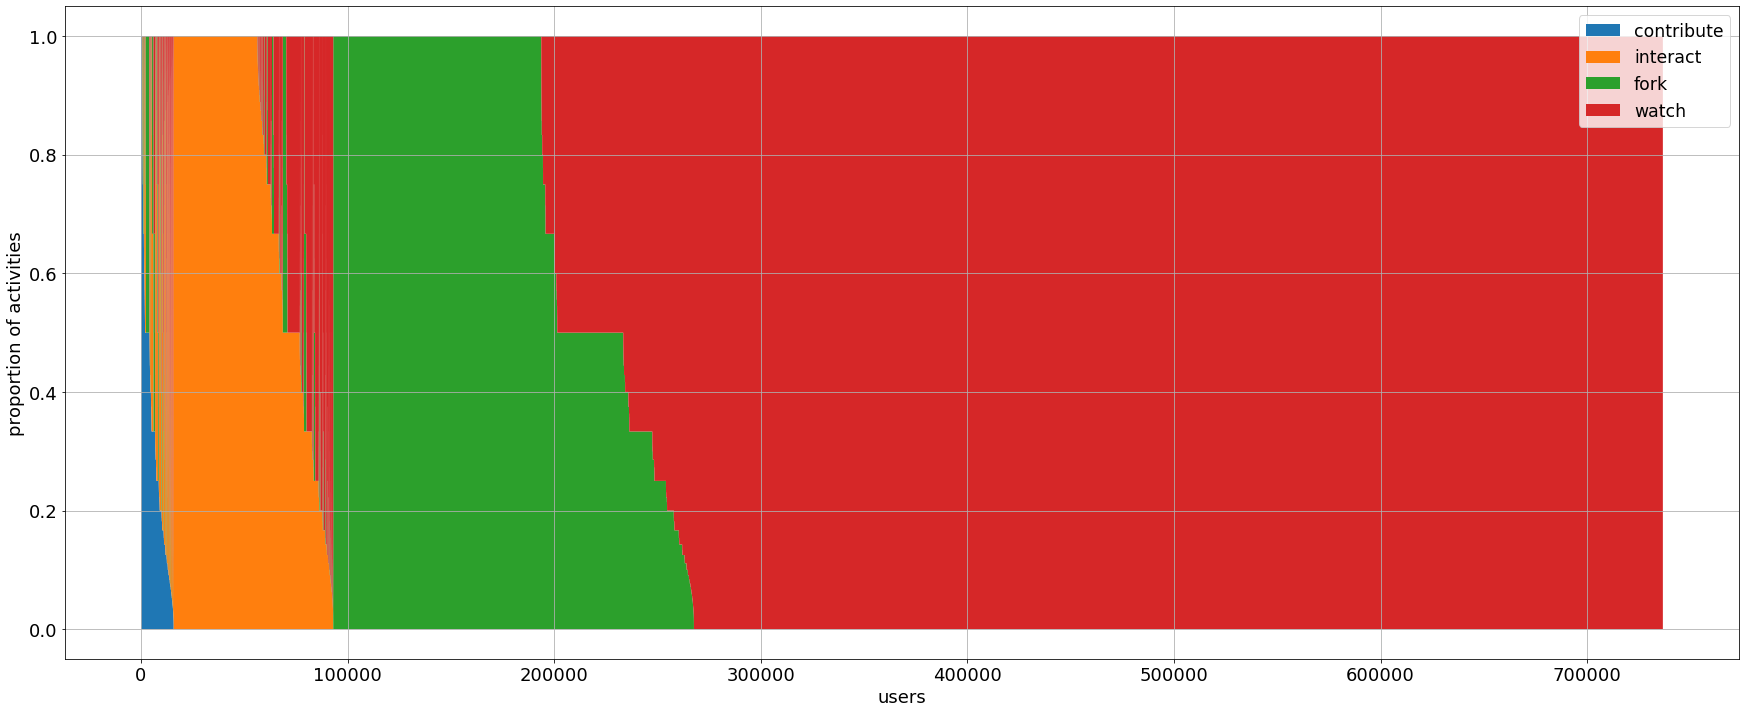

In [17]:
font = 18

plt.figure(figsize=(30, 12))

N = norm_u_distr.shape[0]
x = range(N)
y = norm_u_distr.sample(N).sort_values(by=['contribute', 'interact','fork'], ascending=False)

plt.fill_between(x, 0, y["contribute"], label='contribute')
plt.fill_between(x, y["contribute"], y["interact"]+y["contribute"], label='interact')
plt.fill_between(x, y["contribute"]+y["interact"], y["interact"]+y["contribute"]+y["fork"], label='fork')
plt.fill_between(x, y["interact"] + y['contribute']+y["fork"], y["watch"]+y["interact"]+y['contribute']+y["fork"], 
                                                                                         label='watch')
plt.grid()
plt.legend(fontsize='xx-large')
plt.xlabel('users', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font);
plt.yticks(fontsize=font);

In [18]:
N_contrib = norm_u_distr[norm_u_distr['contribute'] > 0].shape[0]
print(N_contrib, float(N_contrib)/N)

15812 0.021465030408340573


In [19]:
N_interact = norm_u_distr[(norm_u_distr['contribute'] == 0) & (norm_u_distr['interact'] > 0)].shape[0]
print(N_interact, float(N_interact)/N)

77223 0.10483139661164205


In [20]:
N_fork = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0)].shape[0]
print(N_fork, float(N_fork)/N)

174596 0.23701672458731537


In [21]:
N_fork_only = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0) &
                      (norm_u_distr['watch'] == 0)].shape[0]
print(N_fork_only, float(N_fork_only)/N)

100692 0.1366909209383145


In [22]:
N_watch = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] == 0) &
                      (norm_u_distr['watch'] > 0)].shape[0]
print(N_watch, float(N_watch)/N)

469009 0.636686848392702


In [23]:
N_w_f = norm_u_distr[(norm_u_distr['contribute'] == 0) & 
                      (norm_u_distr['interact'] == 0) & 
                      (norm_u_distr['fork'] > 0) &
                      (norm_u_distr['watch'] > 0)].shape[0]
print(N_w_f, float(N_w_f)/N) 

73904 0.10032580364900087


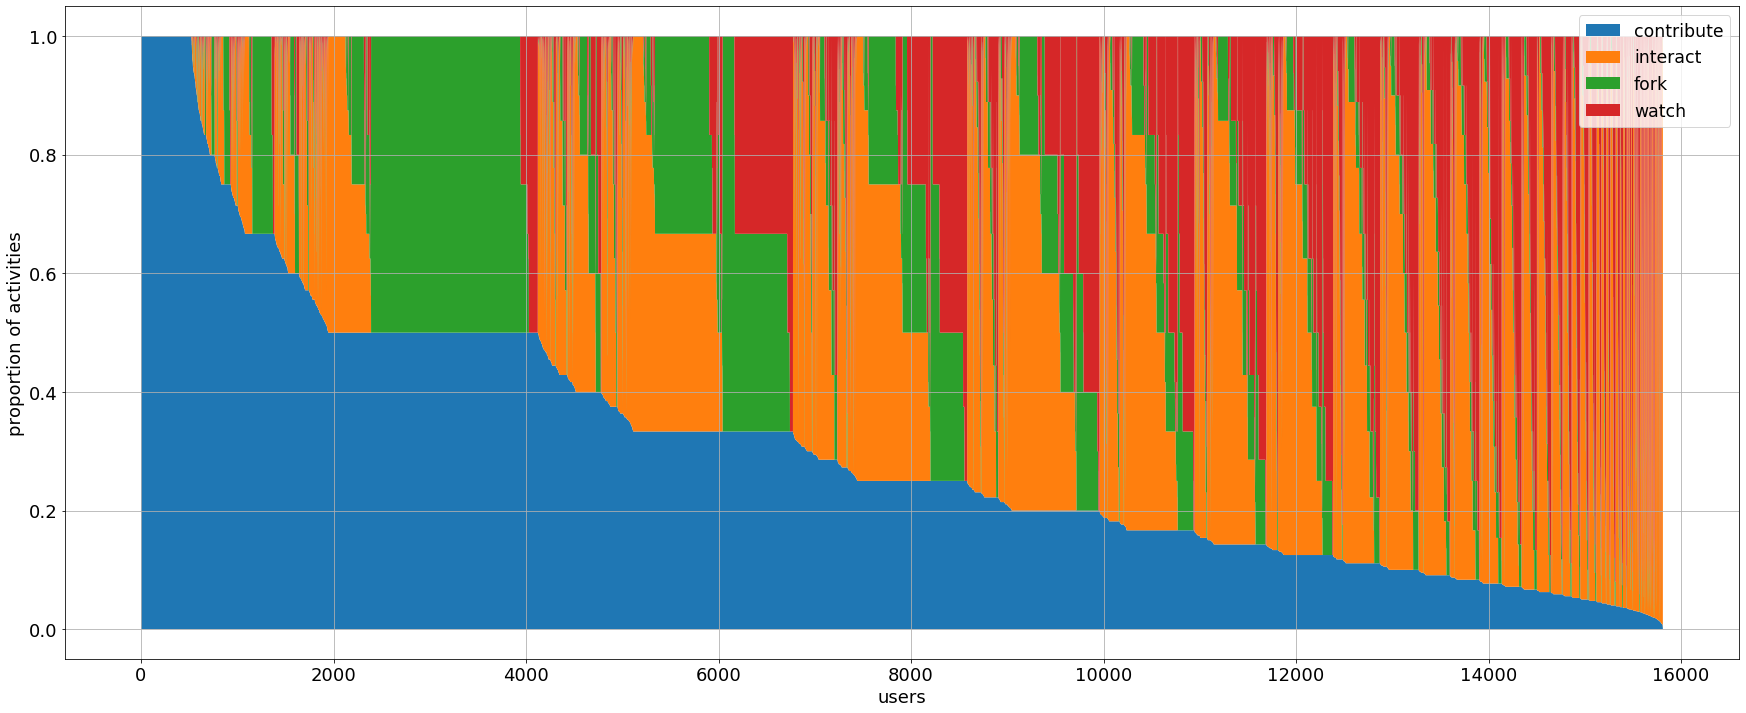

In [24]:
font = 18

plt.figure(figsize=(30, 12))


y = norm_u_distr[norm_u_distr['contribute']>0].sort_values(by=['contribute','interact','fork'], ascending=False)
x = range(y.shape[0])

plt.fill_between(x, 0, y["contribute"], label='contribute')
plt.fill_between(x, y["contribute"], y["interact"]+y["contribute"], label='interact')
plt.fill_between(x, y["contribute"]+y["interact"], y["interact"]+y["contribute"]+y["fork"], label='fork')
plt.fill_between(x, y["interact"] + y['contribute']+y["fork"], y["watch"]+y["interact"]+y['contribute']+y["fork"], 
                                                                                         label='watch')
plt.grid()
plt.legend(fontsize='xx-large')
plt.xlabel('users', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font);
plt.yticks(fontsize=font);

## Activities distribution month by month

In [25]:
import pytz

In [26]:
start_d = datetime(2018, 1, 1, tzinfo=pytz.timezone('UTC'))
next_d = start_d + pd.DateOffset(months=1)

cat_distr = {'contribute': [], 'interact': [], 'watch': [], 'fork': []}
for _ in range(12):
    
    curr_a = a18[(a18['created_at'] >= start_d) & (a18['created_at'] < next_d)]

    cat = curr_a.groupby(by=['target', 'cat'])[['source']].count().reset_index()
    cat.columns = ['project', 'category', '#events']

    
    distr = cat.pivot(index='project', columns='category', values='#events').fillna(0)
    norm_distr = distr.apply(lambda x: get_perc_distr(x, cat_list_2), axis=1)
    for c in cat_list_2:
        cat_distr[c].append(norm_distr[c].values)
    
    start_d = next_d
    next_d = start_d + pd.DateOffset(months=1)

In [27]:
base = start_d
date_list = [base + pd.DateOffset(months=x) for x in range(0, 12)]
date_labels = [x.strftime('%b %Y') for x in date_list]

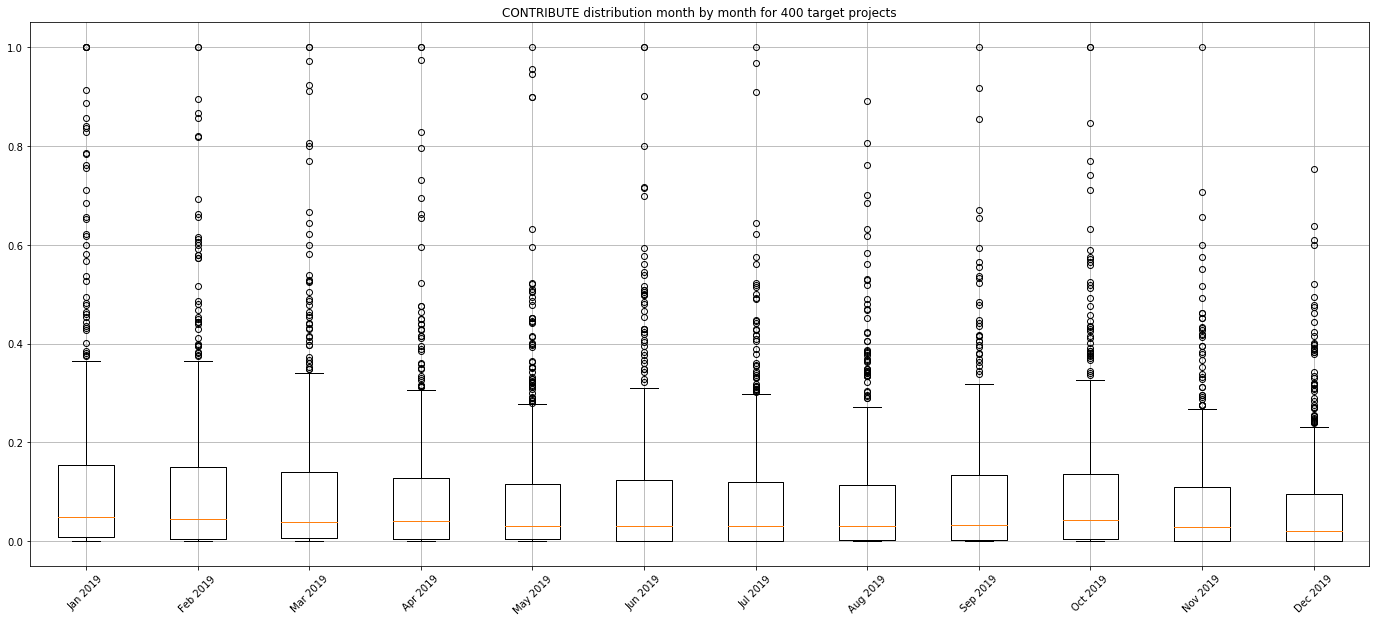

In [28]:
plt.figure(figsize=(24, 10))
plt.boxplot(cat_distr['contribute'])
plt.xticks(range(1, 13), date_labels, rotation=45)
plt.title('CONTRIBUTE distribution month by month for 400 target projects')
plt.grid()

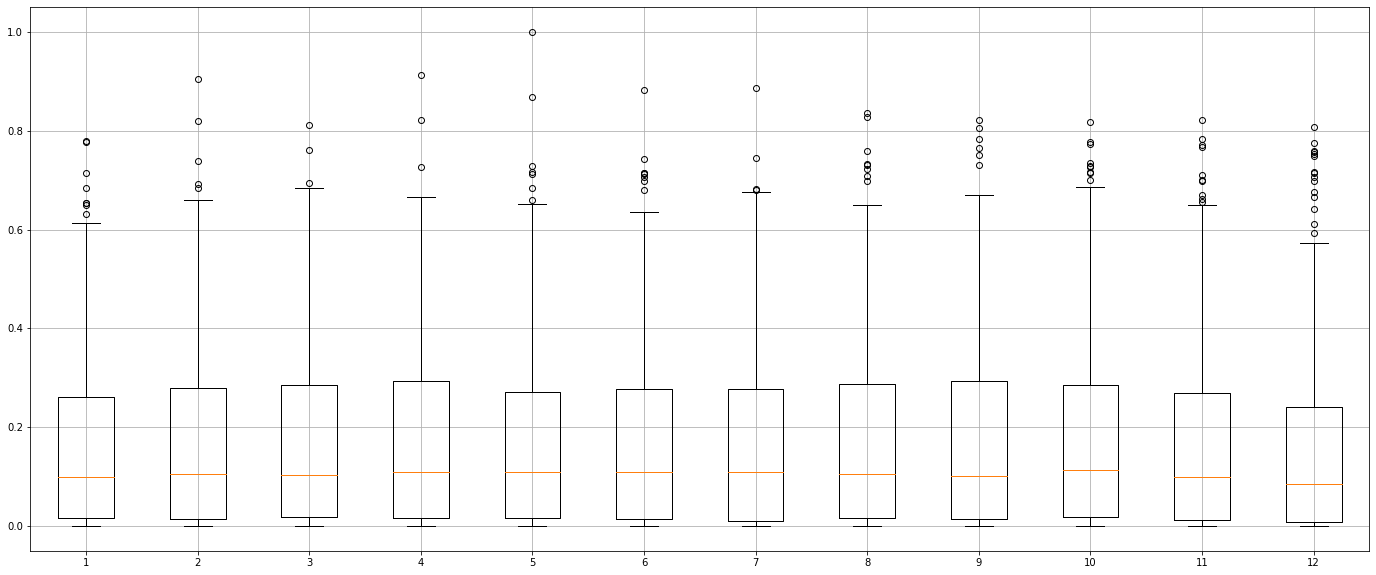

In [29]:
plt.figure(figsize=(24, 10))
plt.boxplot(cat_distr['interact'])
plt.grid()

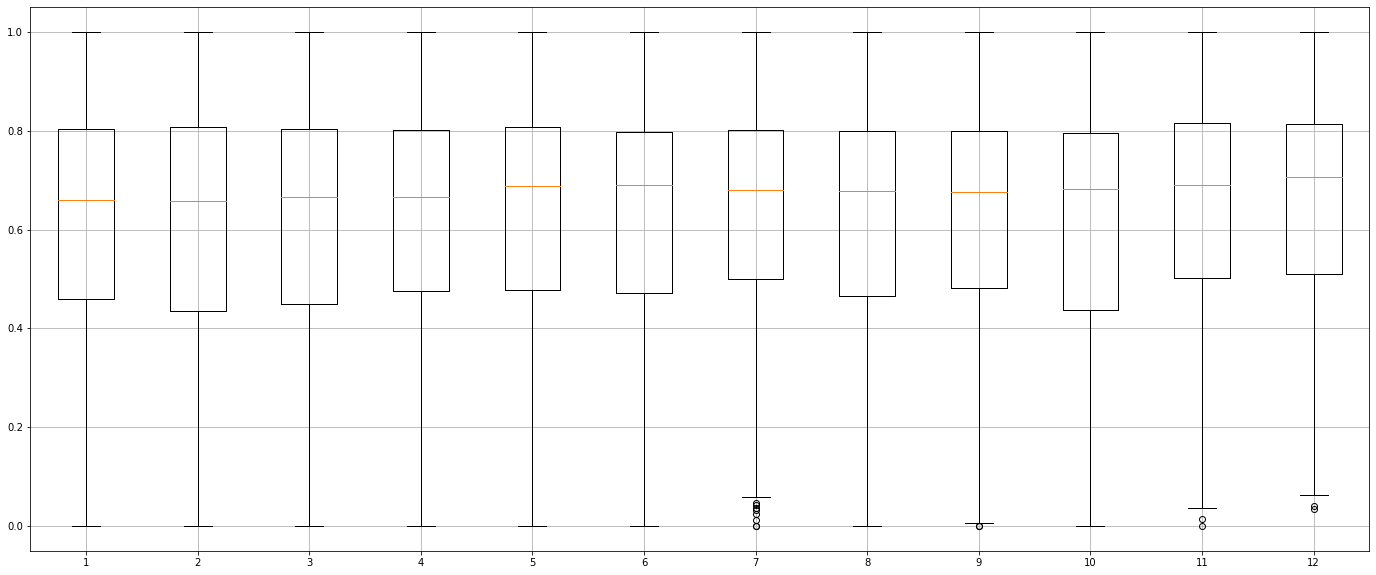

In [30]:
plt.figure(figsize=(24, 10))
plt.boxplot(cat_distr['watch'])
plt.grid()

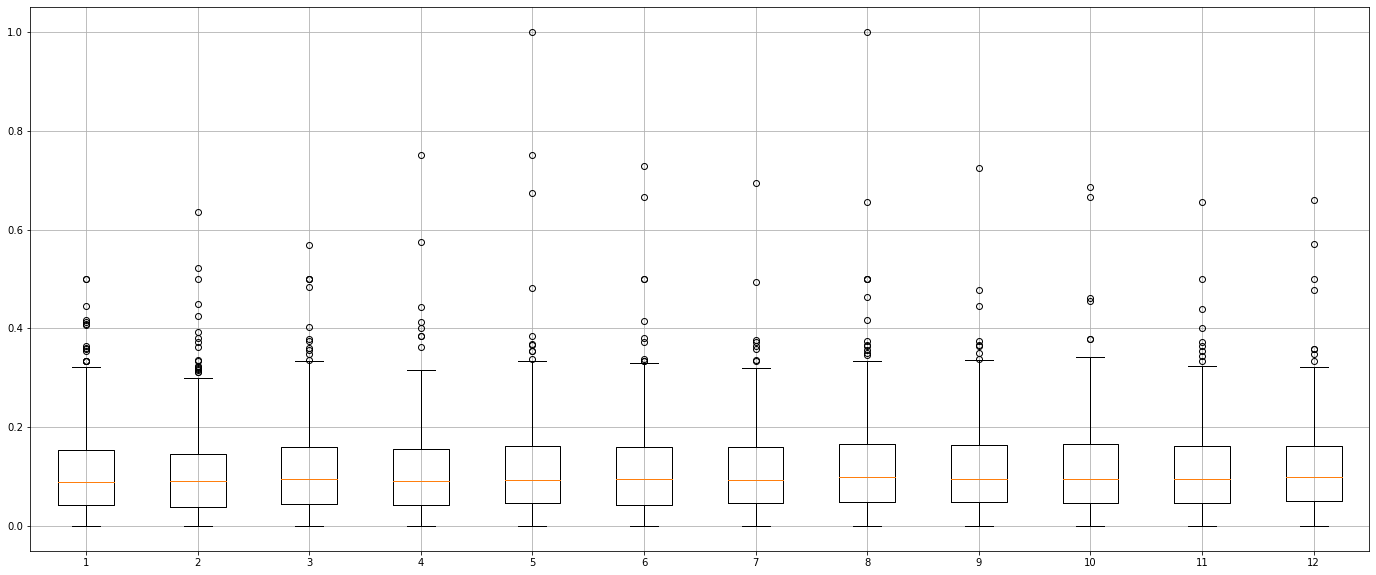

In [31]:
plt.figure(figsize=(24, 10))
plt.boxplot(cat_distr['fork'])
plt.grid()

## Activities Distribution inside projects

In [32]:
counts = a18.groupby(by=['target', 'cat'])[['source']].count().reset_index()
counts.columns = ['project', 'category', '#events']
counts.head()

,project,category,#events
0,77830440,fork,7
1,77830440,watch,48
2,77912349,contribute,202
3,77912349,fork,662
4,77912349,interact,60


In [33]:
#cmap = cm.get_cmap('autumn')
#counts.pivot(index='project', columns='category', values='#events').fillna(0)\
#                                .plot(kind='bar', stacked=True, 
#                                      figsize=(20,10), title='Category distribution in 2018', cmap=cmap)

In [34]:
activity_counts = a18.groupby(by=['target', 'event'])[['source']].count().reset_index()
activity_counts.columns = ['project', 'event', 'freq']
activity_counts.head()

,project,event,freq
0,77830440,ForkEvent,7
1,77830440,WatchEvent,48
2,77912349,ForkEvent,662
3,77912349,IssueCommentEvent,33
4,77912349,IssuesEvent,27


In [35]:
sort_events = ['CreateEvent', 'DeleteEvent', 'PullRequestEvent', 'PushEvent','ReleaseEvent', 'MemberEvent',
              'CommitCommentEvent', 'GollumEvent', 'PullRequestReviewCommentEvent','IssuesEvent', 
               'IssueCommentEvent',
                'ForkEvent', 'WatchEvent']

In [36]:
stacked_activity = activity_counts.pivot(index='project', columns='event', values='freq').fillna(0)
stacked_activity = stacked_activity[sort_events]

In [42]:
cmap = cm.get_cmap('Spectral')
#stacked_activity.plot(kind='bar', stacked=True, figsize=(20,10), title='Events distribution in 2018', cmap=cmap)

In [38]:
elist = []

for e in categories.values():
    elist  = elist + e

In [39]:
stacked_activity_norm = activity_counts.pivot(index='project', columns='event', values='freq').fillna(0)\
        .apply(lambda x: get_perc_distr(x, elist), axis=1)

# sort columns
stacked_activity_norm = stacked_activity_norm[sort_events]

In [40]:
# sort projects
stacked_activity_norm = stacked_activity_norm.sort_values(by=['WatchEvent'])

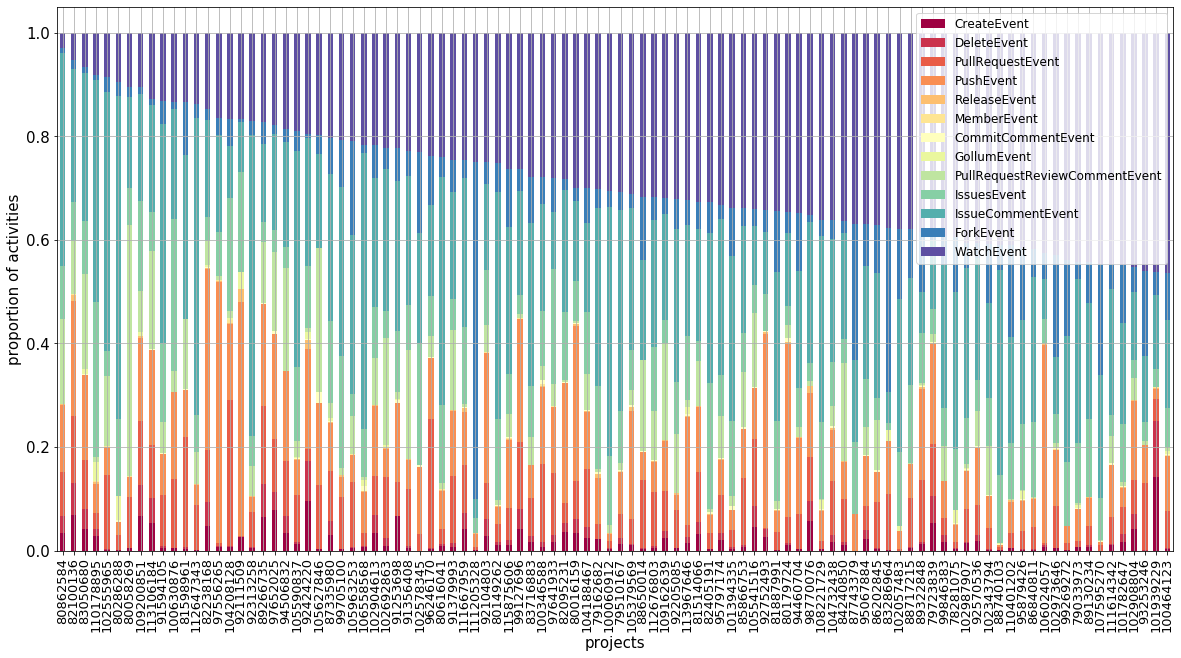

In [43]:
stacked_activity_norm.iloc[:100].plot(kind='bar', stacked=True, figsize=(20,10), cmap=cmap)

font = 15
plt.grid()
plt.legend(fontsize='large')
plt.xlabel('projects', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font-2);
plt.yticks(fontsize=font);

In [44]:
elist

['WatchEvent',
 'CommitCommentEvent',
 'GollumEvent',
 'PullRequestReviewCommentEvent',
 'IssuesEvent',
 'IssueCommentEvent',
 'CreateEvent',
 'DeleteEvent',
 'PullRequestEvent',
 'PushEvent',
 'ReleaseEvent',
 'MemberEvent',
 'ForkEvent']

In [45]:
aggregated_activity = activity_counts.pivot(index='project', columns='event', values='freq').fillna(0)\
        .drop('WatchEvent', axis=1).apply(lambda x: get_perc_distr(x, elist[1:]), axis=1)

# sort columns
aggregated_activity = aggregated_activity[sort_events[:-1]]

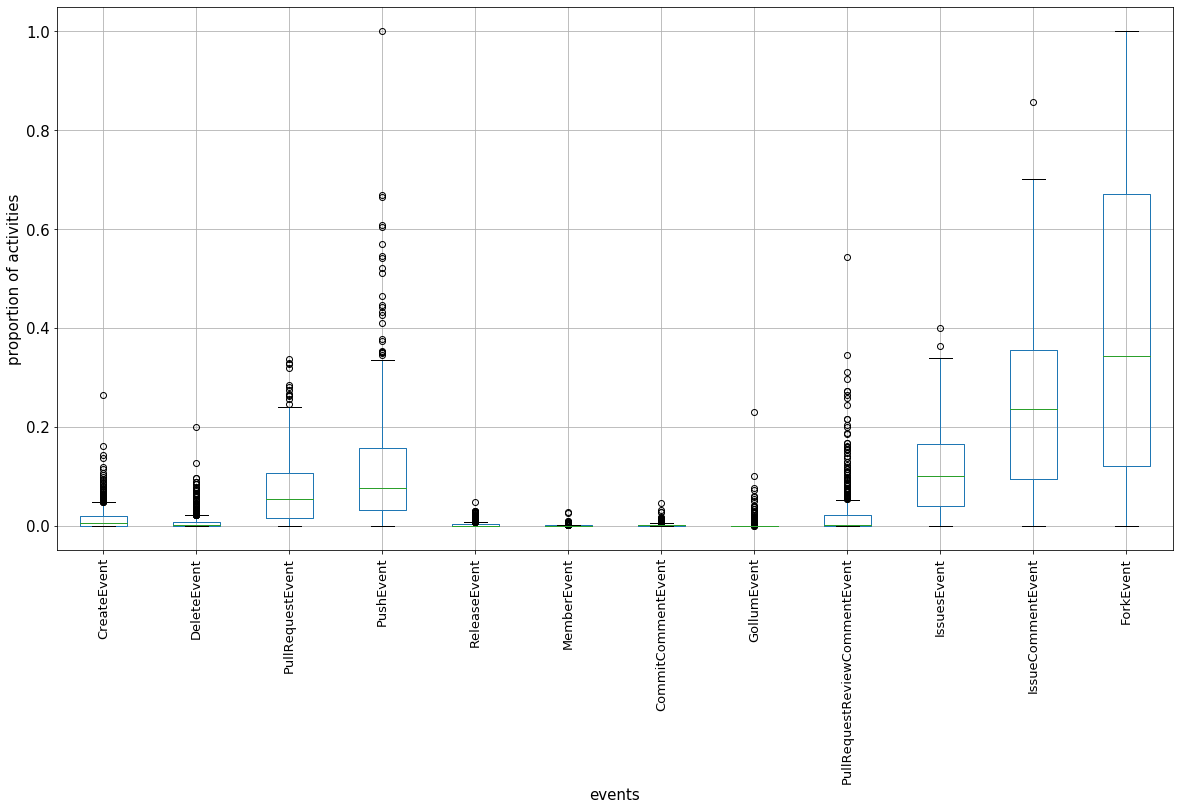

In [46]:
aggregated_activity.boxplot(figsize=(20, 10), rot=90)

font = 15
plt.xlabel('events', fontsize=font)
plt.ylabel('proportion of activities', fontsize=font)
plt.xticks(fontsize=font-2);
plt.yticks(fontsize=font);

## Single Project Zoom

In [47]:
p_sample = a18[a18['target'] == 94911145]

In [48]:
p_sample.shape

(13510, 5)

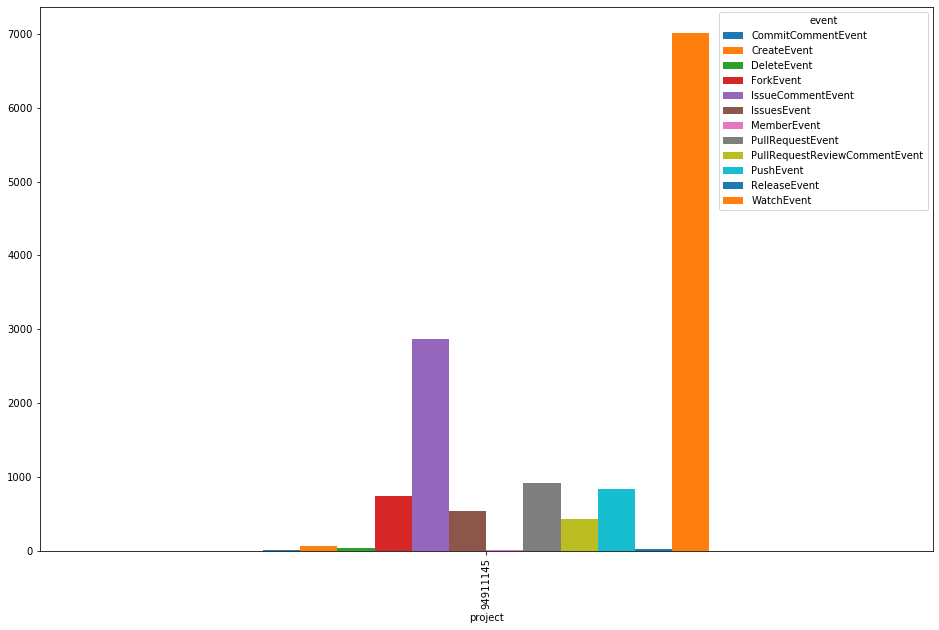

In [49]:
events = p_sample.groupby(by=['target', 'event'])[['source']].count().reset_index()
events.columns = ['project', 'event', '#events']
events.pivot(index='project', columns='event', values='#events').plot(kind='bar', figsize=(16,10))

In [50]:
start_d = datetime(2018, 1, 1, tzinfo=pytz.timezone('UTC'))
next_d = start_d + pd.DateOffset(months=1)

df = pd.DataFrame()
for _ in range(12):
    
    curr_a = p_sample[(p_sample['created_at'] >= start_d) & (p_sample['created_at'] < next_d)]

    events = curr_a.groupby(by=['target', 'event'])[['source']].count().reset_index()
    events.columns = ['project', 'event', '#events']
    row = events.pivot(index='project', columns='event', values='#events')
    row['date'] = start_d.strftime('%b %Y')
    row = row.set_index('date')
    
    df = df.append(row)
    
    start_d = next_d
    next_d = start_d + pd.DateOffset(months=1)

/home/brambilla/anaconda3/envs/oss-p/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


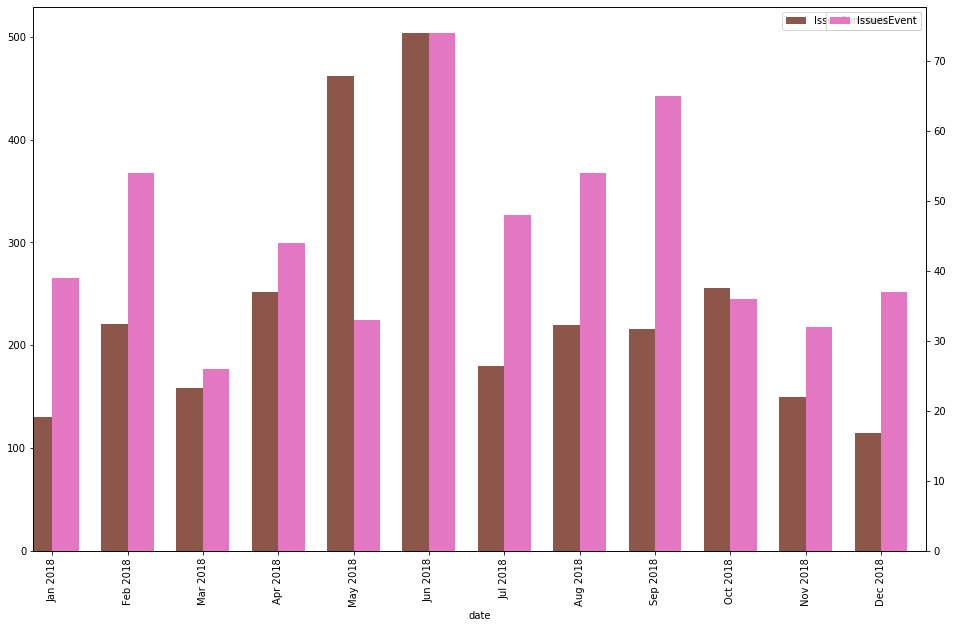

In [51]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
w = 0.35

df[['IssueCommentEvent']].plot(kind='bar', figsize=(16,10), ax=ax1, color='tab:brown', position=1, width=w)
df[['IssuesEvent']].plot(kind='bar', figsize=(16,10), ax=ax2, color='tab:pink', position=0, width=w)

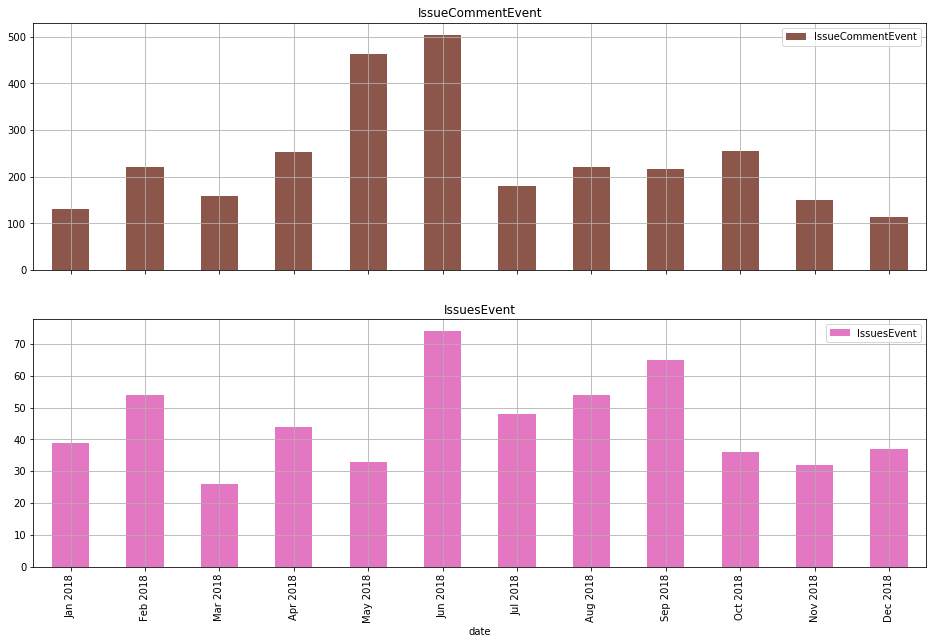

In [52]:
df[['IssueCommentEvent', 'IssuesEvent']].plot(kind='bar', color=['tab:brown', 'tab:pink'],
                                              figsize=(16,10), grid=True,subplots=True,sharex=True);

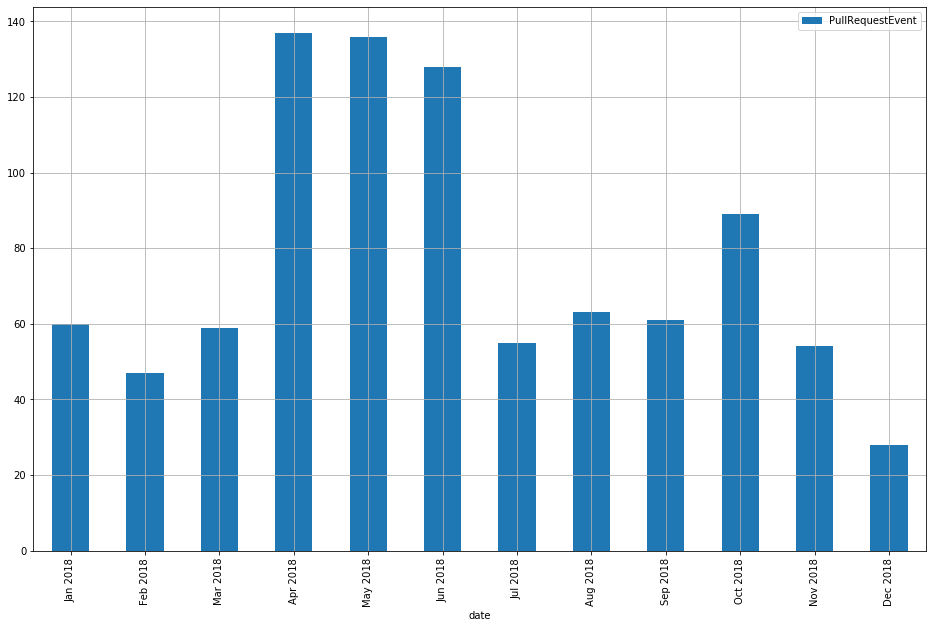

In [53]:
df[[ 'PullRequestEvent']].plot(kind='bar', figsize=(16,10), grid=True);

### Project timeseries

In [54]:
p_ts = p_sample.drop(['source'], axis=1).set_index('created_at')
releases = p_ts[p_ts['event'] == 'ReleaseEvent']

In [55]:
p_ts.head()

,target,event,cat
created_at,,,
2018-01-09 03:00:00+00:00,94911145,WatchEvent,watch
2018-01-09 03:02:38+00:00,94911145,WatchEvent,watch
2018-01-09 03:09:22+00:00,94911145,WatchEvent,watch
2018-01-09 03:10:29+00:00,94911145,WatchEvent,watch
2018-01-09 03:11:08+00:00,94911145,WatchEvent,watch


In [56]:
releases.head()

,target,event,cat
created_at,,,
2018-01-09 21:58:02+00:00,94911145,ReleaseEvent,contribute
2018-02-13 03:32:40+00:00,94911145,ReleaseEvent,contribute
2018-02-17 20:41:50+00:00,94911145,ReleaseEvent,contribute
2018-03-13 16:36:12+00:00,94911145,ReleaseEvent,contribute
2018-03-13 00:03:31+00:00,94911145,ReleaseEvent,contribute


In [57]:
all_ts = pd.DataFrame()
for c in ['contribute', 'interact', 'watch', 'fork']:
    ts = p_ts[p_ts['cat'] == c].groupby(pd.Grouper(freq='D'))[['target']].count()
    ts.columns = [c]
    
    all_ts = pd.concat([all_ts, ts], axis=1)

/home/brambilla/anaconda3/envs/oss-p/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


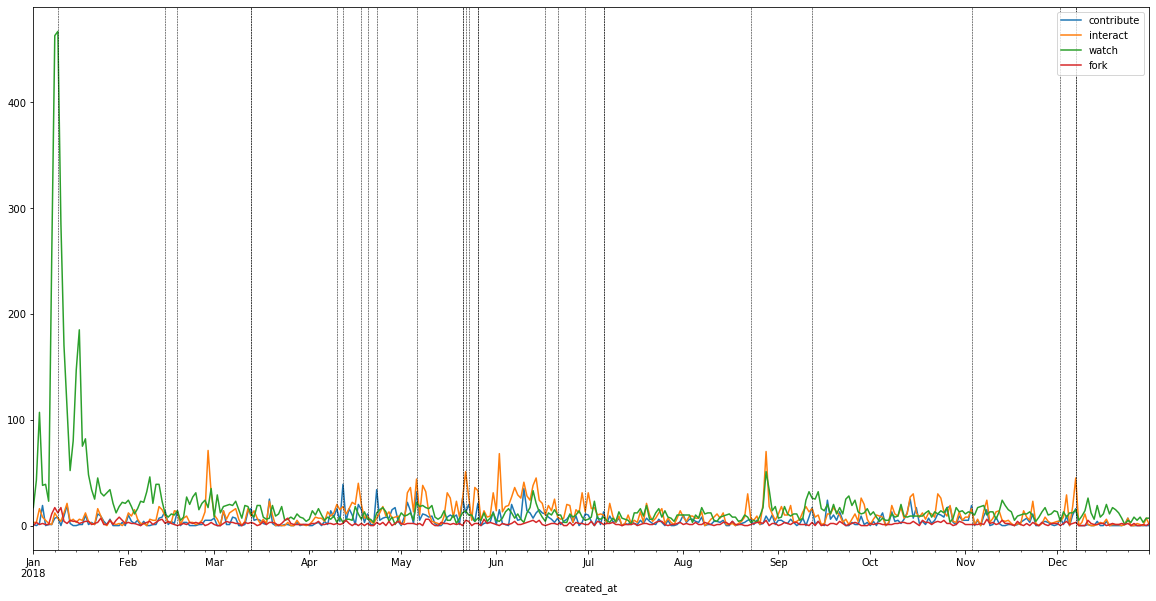

In [58]:
all_ts.fillna(0).plot(figsize=(20, 10))

for r in releases.index:
    plt.axvline(r.date(), linestyle='--', color='black', linewidth=0.5)

### Zypf's Distribution

Sample projects

In [59]:
ranking = p_sample.groupby('source')['event'].count().sort_values(ascending=False).reset_index(drop=True)

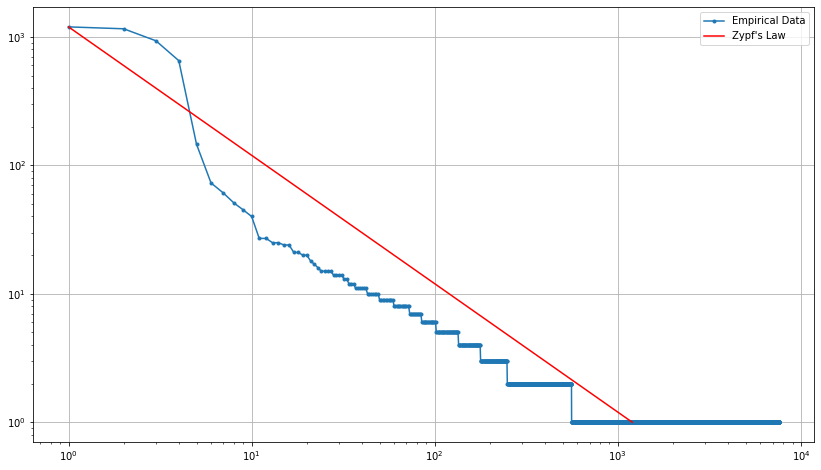

In [60]:
plt.figure(figsize=(14, 8))
x_axis = range(1, len(ranking)+1)
plt.loglog(x_axis, ranking.values, marker=".", label='Empirical Data')
plt.plot([1, ranking.values[0]],[ranking.values[0] ,1], color='r', label='Zypf\'s Law')
plt.grid()
plt.legend()

In [61]:
len(ranking)

7559

In [62]:
test_p = a18['target'].unique()

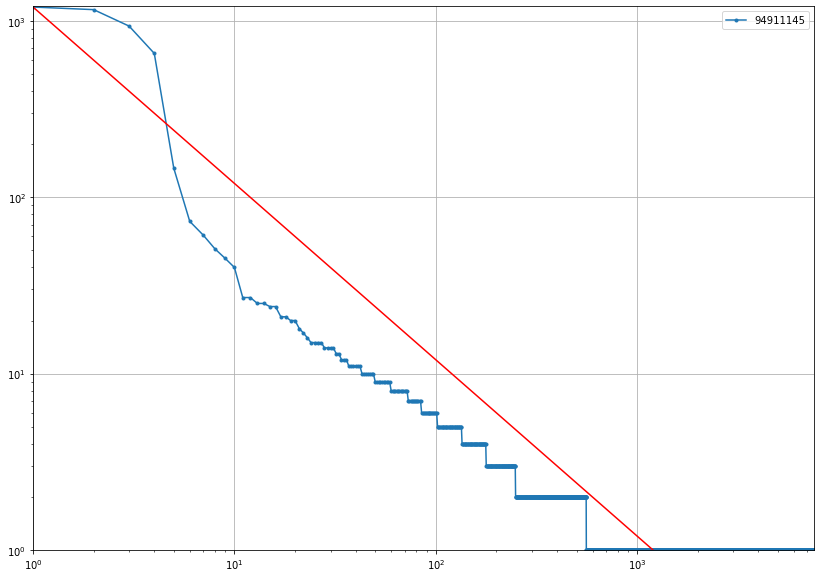

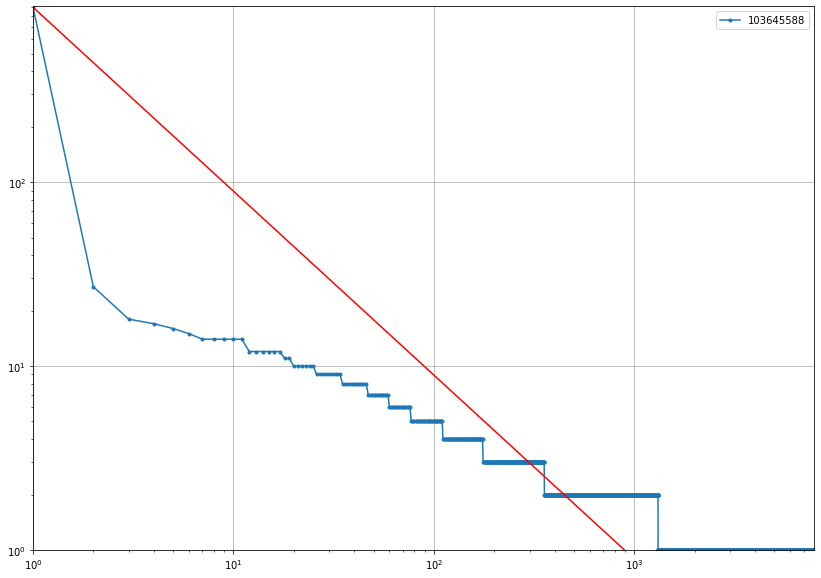

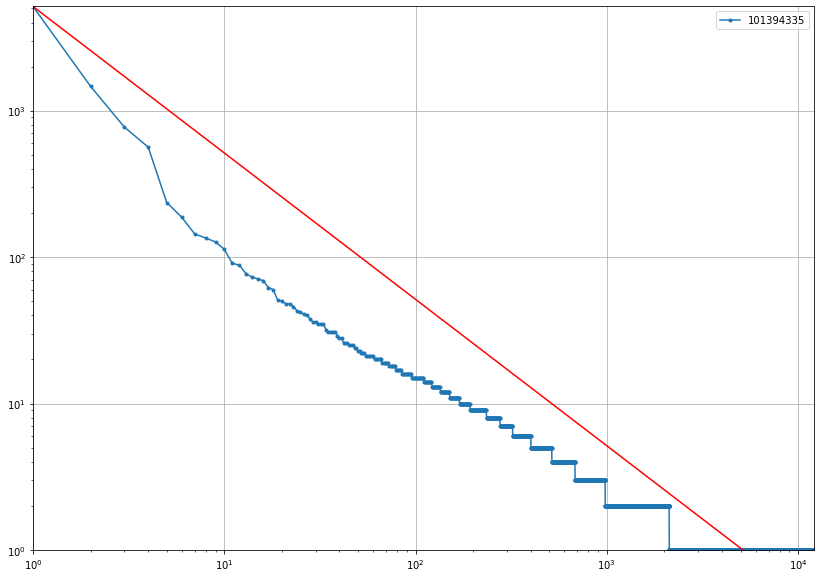

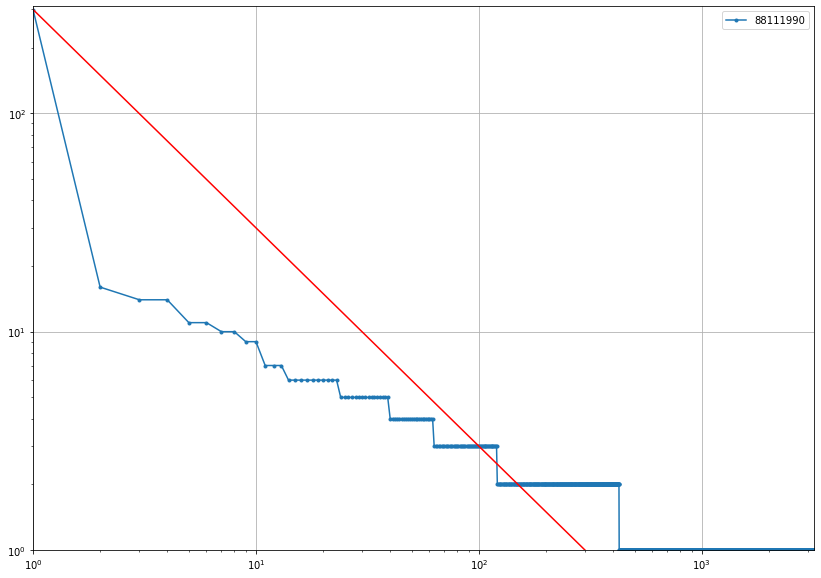

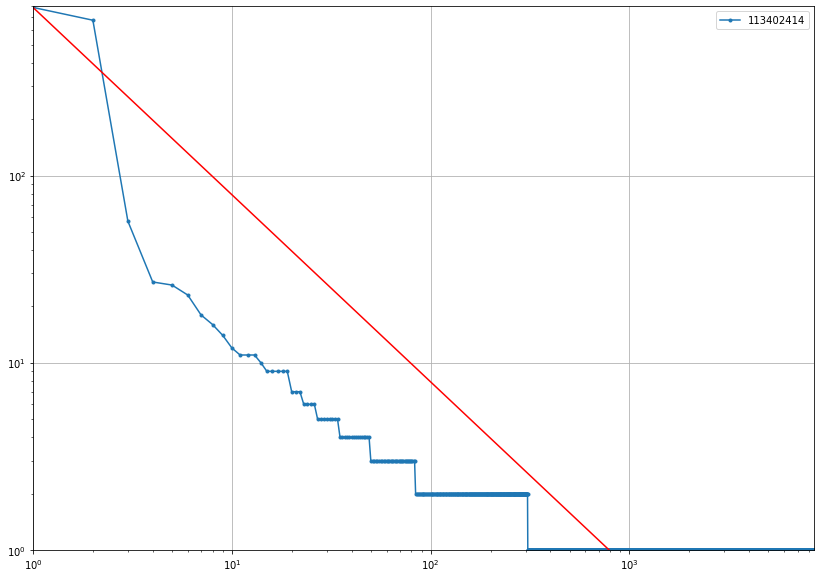

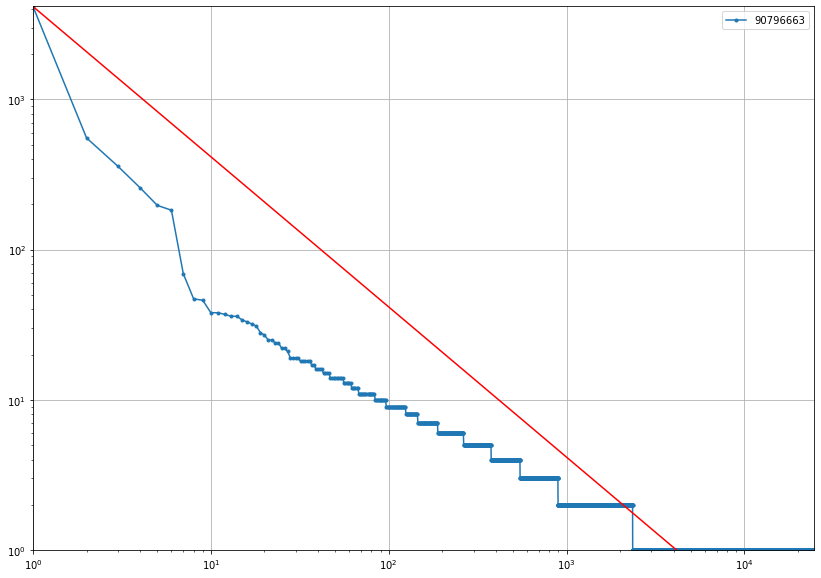

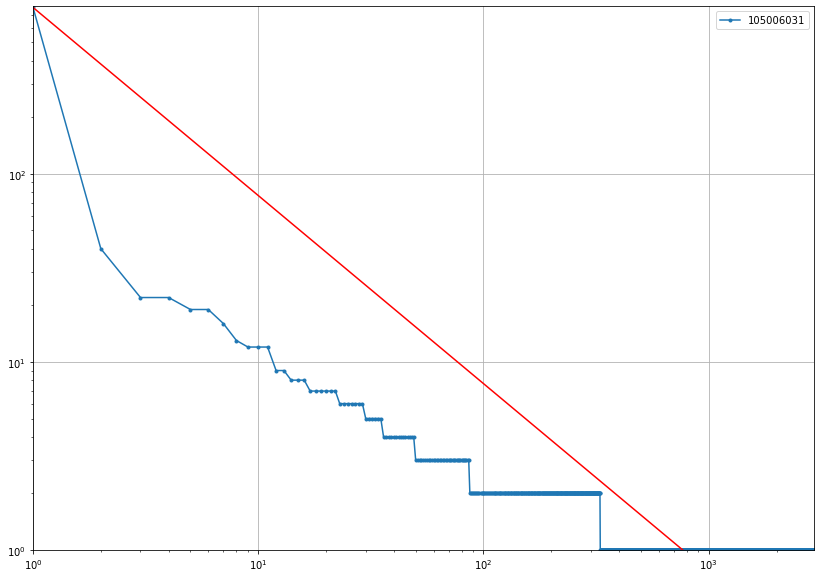

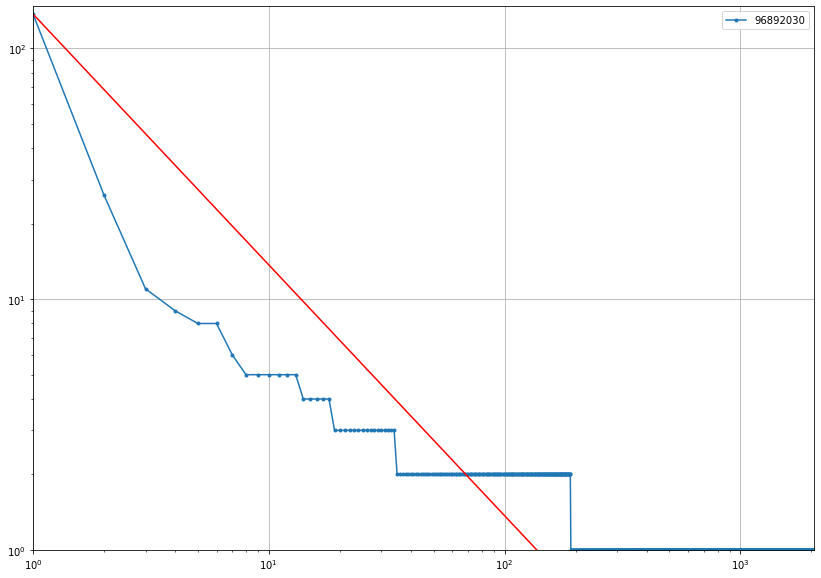

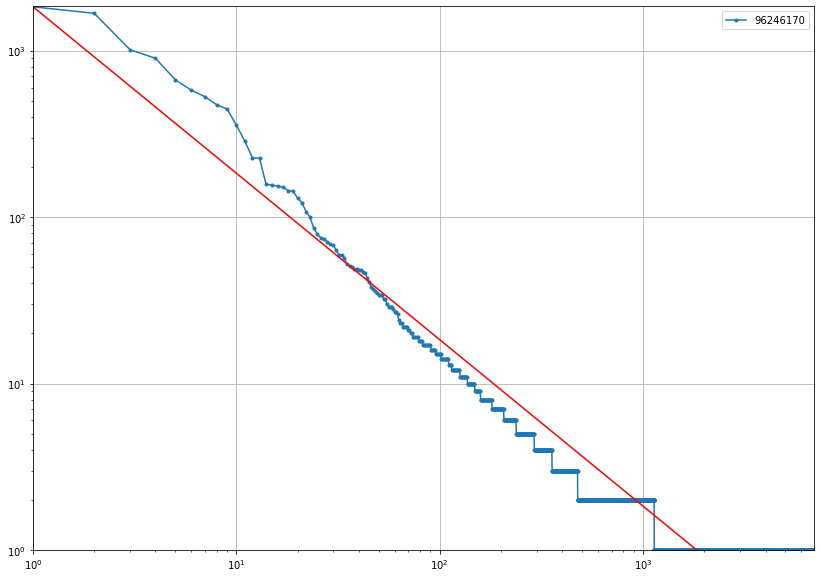

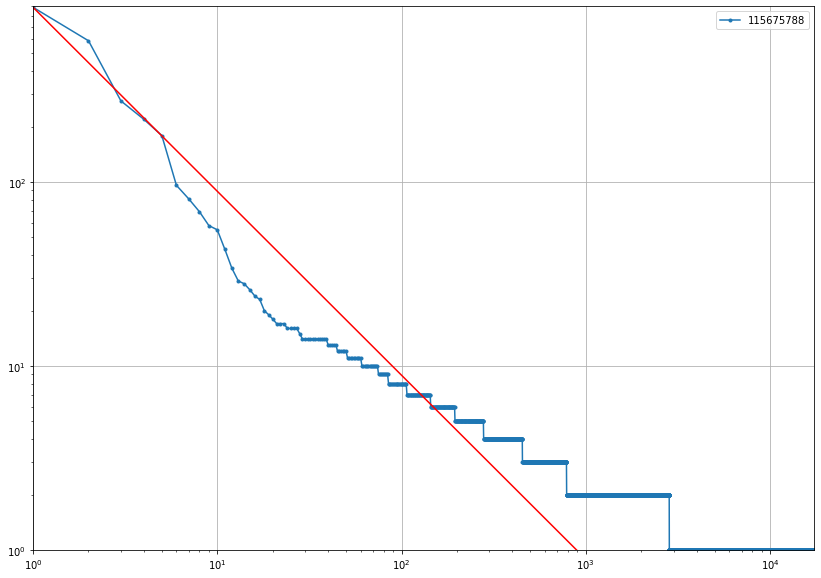

In [63]:
n = 10
for p in test_p[:n]:
    p_sample = a18[a18['target'] == p]
    uranking = p_sample.groupby('source')['event'].count().sort_values(ascending=False).reset_index(drop=True)
    plt.figure(figsize=(14, 10))
    
    x_axis = range(1, len(uranking)+1)
    plt.loglog(x_axis, uranking.values, marker=".", label=str(p))
    plt.plot([1, uranking.values[0]],[uranking.values[0] ,1], color='r')
    plt.xlim([1, max(max(uranking.values), len(uranking))+10])
    plt.ylim([1, max(uranking.values)+10])
    plt.grid()
    plt.legend()